In [419]:
import pandas as pd

# na_values Turns values into NaN
data = pd.read_csv('../Datasets/CSCS_data_anon.csv', 
                   na_values=["9999", "", " ", "Presented but no response", "NA"],
                   low_memory=False)

cols = pd.read_csv('../Datasets/var_names.csv')

empty = (data.isna().sum()==data.shape[0])
data = data[empty.index[~empty]] # keep non empty columns only

In [420]:
df_happinessScale_numFriends = data[['CONNECTION_social_barriers_shy', 
                                     'WELLNESS_subjective_happiness_scale_happy', 
                                     'CONNECTION_social_num_close_friends', 
                                     'DATASET', 
                                     'WELLNESS_self_rated_mental_health', 
                                     'WELLNESS_self_rated_physical_health', 
                                     'CONNECTION_social_num_family_p7d', 
                                     'CONNECTION_social_time_family_p7d', 
                                     'CONNECTION_social_time_friends_p7d', 
                                     'CONNECTION_social_time_friends_p7d',
                                     'CONNECTION_activities_new_friend_p3m', 
                                     'CONNECTION_activities_hug_p3m', 
                                     'CONNECTION_activities_church_p3m', 
                                     'CONNECTION_activities_onlinegames_p3m' , 
                                     'CONNECTION_activities_computer_games_p3m',
                                     'CONNECTION_activities_coffee_p3m', 
                                     'CONNECTION_activities_walk_p3m']].copy()

In [421]:
df_happinessScale_numFriends = df_happinessScale_numFriends[df_happinessScale_numFriends['DATASET'] == '2022 Cohort'].copy()

In [422]:
df_happinessScale_numFriends.WELLNESS_subjective_happiness_scale_happy.unique()

array(['6', '5', '7 - A very happy person', '4', '3',
       '1 - Not a happy person', nan, '2'], dtype=object)

In [423]:
df_happinessScale_numFriends.CONNECTION_social_num_close_friends.unique()

array([18.,  5.,  7.,  2.,  6., 17.,  4.,  1.,  0., 15.,  3., 20., 10.,
       nan, 12.,  8.,  9., 11., 14., 13.])

In [424]:
df_happinessScale_numFriends.shape

(493, 17)

In [425]:
df_happinessScale_numFriends.isna().sum()

CONNECTION_social_barriers_shy               67
WELLNESS_subjective_happiness_scale_happy    38
CONNECTION_social_num_close_friends          36
DATASET                                       0
WELLNESS_self_rated_mental_health            37
WELLNESS_self_rated_physical_health          37
CONNECTION_social_num_family_p7d             37
CONNECTION_social_time_family_p7d            37
CONNECTION_social_time_friends_p7d           38
CONNECTION_social_time_friends_p7d           38
CONNECTION_activities_new_friend_p3m         16
CONNECTION_activities_hug_p3m                20
CONNECTION_activities_church_p3m             17
CONNECTION_activities_onlinegames_p3m        17
CONNECTION_activities_computer_games_p3m     17
CONNECTION_activities_coffee_p3m             16
CONNECTION_activities_walk_p3m               16
dtype: int64

In [426]:
df_happinessScale_numFriends.dropna(inplace=True)

In [427]:
df_happinessScale_numFriends.isna().sum()

CONNECTION_social_barriers_shy               0
WELLNESS_subjective_happiness_scale_happy    0
CONNECTION_social_num_close_friends          0
DATASET                                      0
WELLNESS_self_rated_mental_health            0
WELLNESS_self_rated_physical_health          0
CONNECTION_social_num_family_p7d             0
CONNECTION_social_time_family_p7d            0
CONNECTION_social_time_friends_p7d           0
CONNECTION_social_time_friends_p7d           0
CONNECTION_activities_new_friend_p3m         0
CONNECTION_activities_hug_p3m                0
CONNECTION_activities_church_p3m             0
CONNECTION_activities_onlinegames_p3m        0
CONNECTION_activities_computer_games_p3m     0
CONNECTION_activities_coffee_p3m             0
CONNECTION_activities_walk_p3m               0
dtype: int64

In [428]:
df_happinessScale_numFriends.shape

(401, 17)

In [429]:
df_happinessScale_numFriends.DATASET.unique()

array(['2022 Cohort'], dtype=object)

In [430]:
df_happinessScale_numFriends.DATASET.value_counts()

DATASET
2022 Cohort    401
Name: count, dtype: int64

In [431]:
df_happinessScale_numFriends.dtypes

CONNECTION_social_barriers_shy                object
WELLNESS_subjective_happiness_scale_happy     object
CONNECTION_social_num_close_friends          float64
DATASET                                       object
WELLNESS_self_rated_mental_health             object
WELLNESS_self_rated_physical_health           object
CONNECTION_social_num_family_p7d             float64
CONNECTION_social_time_family_p7d            float64
CONNECTION_social_time_friends_p7d           float64
CONNECTION_social_time_friends_p7d           float64
CONNECTION_activities_new_friend_p3m          object
CONNECTION_activities_hug_p3m                 object
CONNECTION_activities_church_p3m              object
CONNECTION_activities_onlinegames_p3m         object
CONNECTION_activities_computer_games_p3m      object
CONNECTION_activities_coffee_p3m              object
CONNECTION_activities_walk_p3m                object
dtype: object

In [432]:
# Change the happiness scale to an int.
df_happinessScale_numFriends['WELLNESS_subjective_happiness_scale_happy'] = df_happinessScale_numFriends['WELLNESS_subjective_happiness_scale_happy'].astype(str).str.extract(r'(\d+)')[0].astype(int)

In [433]:
df_happinessScale_numFriends.describe()

,WELLNESS_subjective_happiness_scale_happy,CONNECTION_social_num_close_friends,CONNECTION_social_num_family_p7d,CONNECTION_social_time_family_p7d,CONNECTION_social_time_friends_p7d,CONNECTION_social_time_friends_p7d
count,401.000000,401.000000,401.00000,401.000000,401.000000,401.000000
mean,4.663342,4.496259,3.42394,7.972569,4.688279,4.688279
std,1.462490,3.666144,3.32488,9.496933,5.867290,5.867290
min,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,4.000000,2.000000,1.00000,1.000000,1.000000,1.000000
50%,5.000000,4.000000,3.00000,4.000000,3.000000,3.000000
75%,6.000000,5.000000,4.00000,10.000000,6.000000,6.000000
max,7.000000,20.000000,20.00000,30.000000,30.000000,30.000000


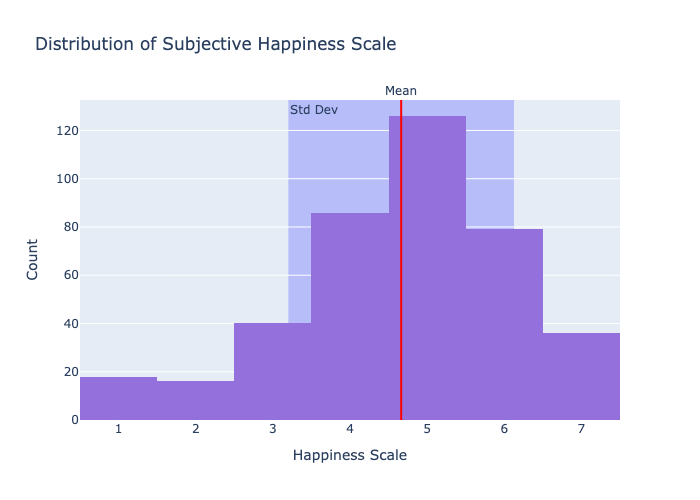

In [434]:
import plotly.express as px
import pandas as pd
import numpy as np

# Assuming df_happinessScale_numFriends is your DataFrame
# Filter and ensure data is within the correct range
df = df_happinessScale_numFriends[df_happinessScale_numFriends['WELLNESS_subjective_happiness_scale_happy'].isin(range(1, 8))]

# Calculate mean and standard deviation
mean_value = df['WELLNESS_subjective_happiness_scale_happy'].mean()
std_dev = df['WELLNESS_subjective_happiness_scale_happy'].std()

# Create the histogram
fig = px.histogram(
    df,
    x='WELLNESS_subjective_happiness_scale_happy',
    title='Distribution of Subjective Happiness Scale',
    labels={'WELLNESS_subjective_happiness_scale_happy': 'Happiness Scale'},
    color_discrete_sequence=['mediumpurple'],
    category_orders={'WELLNESS_subjective_happiness_scale_happy': [1, 2, 3, 4, 5, 6, 7]},  # Ensure custom order
    barnorm='',  # Ensures it is treated as a count histogram, not normalized
    nbins=7  # Specifies the number of bins directly
)

# Customize layout to have no gaps between bins
fig.update_layout(
    xaxis_title='Happiness Scale',
    yaxis_title='Count',
    bargap=0.0  # Set bargap to 0 for no gaps between bars
)

# Add a vertical line for the mean
fig.add_vline(x=mean_value, line_color="red", annotation_text="Mean", annotation_position="top")

# Add a shaded rectangle for the standard deviation
fig.add_vrect(
    x0=mean_value - std_dev, x1=mean_value + std_dev,
    fillcolor="blue", opacity=0.2,
    layer="below", line_width=0,
    annotation_text="Std Dev", annotation_position="top left"
)

# Show the plot
fig.show(renderer='png')


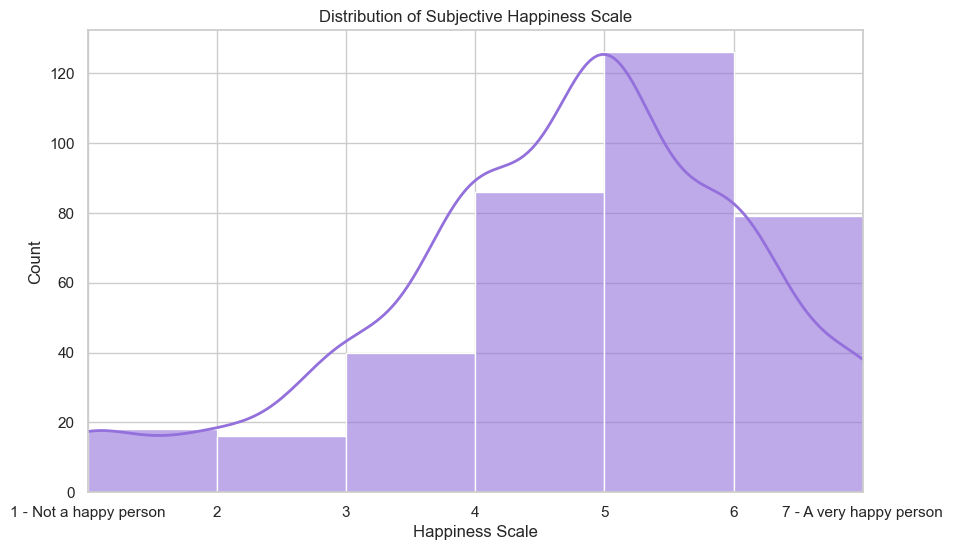

In [435]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_happinessScale_numFriends is your DataFrame
# Make sure the column contains only numeric data [1-7] for accurate plotting

# Filter the DataFrame to exclude non-numeric or out-of-scale values
df = df_happinessScale_numFriends[df_happinessScale_numFriends['WELLNESS_subjective_happiness_scale_happy'].isin(range(1, 8))]

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Create a histogram and KDE plot
sns.histplot(df['WELLNESS_subjective_happiness_scale_happy'], kde=True,
             bins=range(1, 9),  # Adjust the bins to cover from 1 to 7
             color="mediumpurple", alpha=0.6, line_kws={'linewidth': 2})

# Adding labels and title
plt.title('Distribution of Subjective Happiness Scale')
plt.xlabel('Happiness Scale')
plt.ylabel('Count')

# Customize x-ticks for clarity
plt.xticks(ticks=range(1, 8), labels=[
    '1 - Not a happy person', '2', '3', '4', '5', '6', '7 - A very happy person'])

# Set x-axis limits to ensure it only shows 1 to 7
plt.xlim(1, 7)

# Show the plot
plt.show()


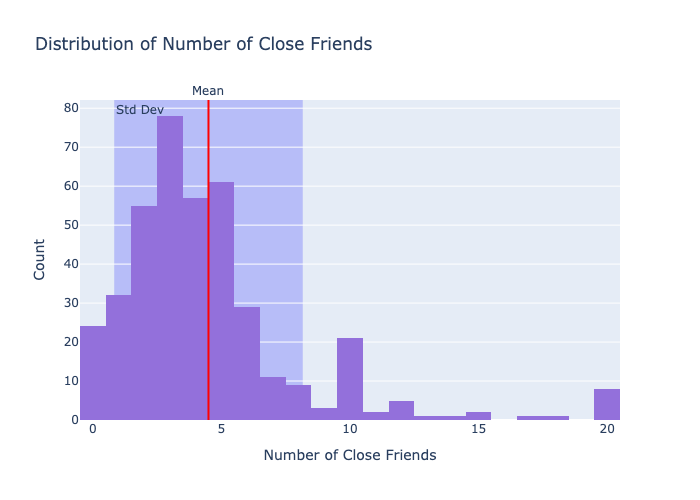

In [436]:
import plotly.express as px

# Assuming df_happinessScale_numFriends is your DataFrame
# Create the histogram
fig = px.histogram(
    df_happinessScale_numFriends,
    x='CONNECTION_social_num_close_friends',
    title='Distribution of Number of Close Friends',
    labels={'CONNECTION_social_num_close_friends': 'Number of close friends'},
    color_discrete_sequence=['mediumpurple']
)

# Customize layout to have no gaps between bins
fig.update_layout(
    xaxis_title='Number of Close Friends',
    yaxis_title='Count',
    bargap=0.0  # Set bargap to 0 for no gaps between bars
)

# Calculate mean and standard deviation
mean_value = df_happinessScale_numFriends['CONNECTION_social_num_close_friends'].mean()
std_dev = df_happinessScale_numFriends['CONNECTION_social_num_close_friends'].std()

# Add a vertical line for the mean
fig.add_vline(x=mean_value, line_color="red", annotation_text="Mean", annotation_position="top")

# Add a shaded rectangle for the standard deviation
fig.add_vrect(
    x0=mean_value - std_dev, x1=mean_value + std_dev,
    fillcolor="blue", opacity=0.2,
    layer="below", line_width=0,
    annotation_text="Std Dev", annotation_position="top left"
)

# Show the plot
fig.show(renderer='png')


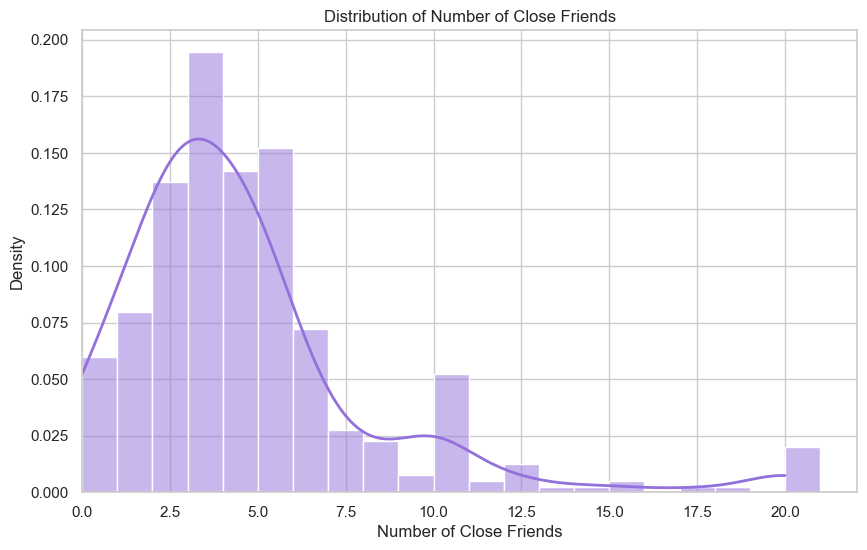

In [437]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_happinessScale_numFriends is your DataFrame and CONNECTION_social_num_close_friends is your column

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create the figure and axes
plt.figure(figsize=(10, 6))

# Plot histogram and KDE
bins = np.arange(0, df_happinessScale_numFriends['CONNECTION_social_num_close_friends'].max() + 2)  # Each bin goes from n to n+1

sns.histplot(data=df_happinessScale_numFriends, x='CONNECTION_social_num_close_friends', kde=True,
             color="mediumpurple", bins=bins, stat='density', line_kws={'linewidth': 2})

# Adding labels and title
plt.title('Distribution of Number of Close Friends')
plt.xlabel('Number of Close Friends')
plt.ylabel('Density')

# Set the x-axis to start at 0
plt.xlim(left=0)

# Show the plot
plt.show()


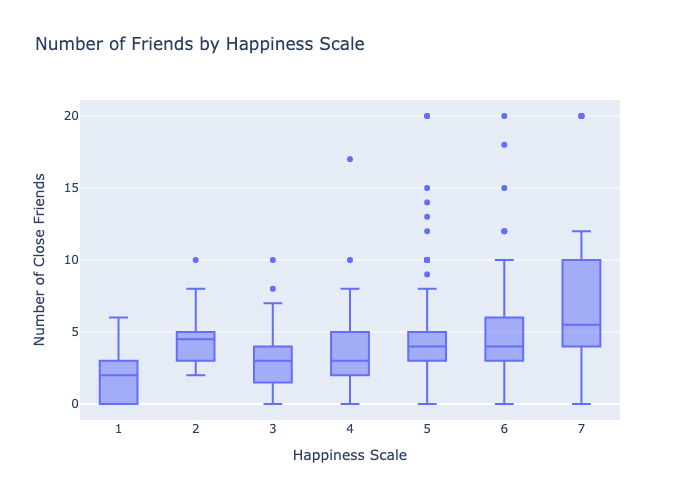

In [438]:
import plotly.express as px

# Assuming df_happinessScale_numFriends has 'WELLNESS_subjective_happiness_scale_happy' for happiness levels
# and 'CONNECTION_social_num_close_friends' for the number of friends

# Create the box plot
fig = px.box(df_happinessScale_numFriends,
             x='WELLNESS_subjective_happiness_scale_happy',
             y='CONNECTION_social_num_close_friends',
             title='Number of Friends by Happiness Scale',
             labels={'WELLNESS_subjective_happiness_scale_happy': 'Happiness Scale', 'CONNECTION_social_num_close_friends': 'Number of Close Friends'},
             category_orders={'WELLNESS_subjective_happiness_scale_happy': [1, 2, 3, 4, 5, 6, 7]})  # Order the x-axis based on the scale

# Customize layout
fig.update_layout(
    xaxis_title='Happiness Scale',
    yaxis_title='Number of Close Friends',
    xaxis_type='category'  # Ensure the x-axis is treated as categorical
)

# Show the plot
fig.show(renderer='png')


                                        OLS Regression Results                                       
Dep. Variable:     WELLNESS_subjective_happiness_scale_happy   R-squared:                       0.112
Model:                                                   OLS   Adj. R-squared:                  0.110
Method:                                        Least Squares   F-statistic:                     50.21
Date:                                       Sun, 24 Nov 2024   Prob (F-statistic):           6.31e-12
Time:                                               10:57:25   Log-Likelihood:                -697.17
No. Observations:                                        401   AIC:                             1398.
Df Residuals:                                            399   BIC:                             1406.
Df Model:                                                  1                                         
Covariance Type:                                   nonrobust                      

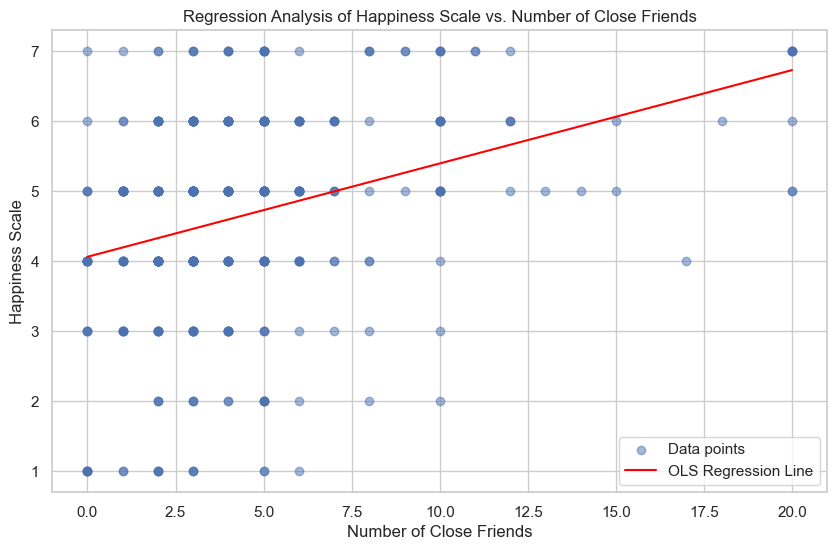

In [439]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Assuming df_happinessScale_numFriends is your DataFrame
# Preparing the data
X = df_happinessScale_numFriends['CONNECTION_social_num_close_friends']  # Predictor
y = df_happinessScale_numFriends['WELLNESS_subjective_happiness_scale_happy']  # Response

# Adding a constant to the predictor variable, necessary for statsmodels' OLS model
X = sm.add_constant(X)

# Fit an OLS model
model = sm.OLS(y, X).fit()

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(X['CONNECTION_social_num_close_friends'], y, alpha=0.5, label='Data points')

# Generating values for the regression line
x_pred = np.linspace(X['CONNECTION_social_num_close_friends'].min(), X['CONNECTION_social_num_close_friends'].max(), 50)
x_pred2 = sm.add_constant(x_pred)  # Need to add a constant to these as well

# Predicting y values for our line
y_pred = model.predict(x_pred2)

# Plotting the regression line
plt.plot(x_pred, y_pred, color='red', label='OLS Regression Line')

# Adding labels and title
plt.title('Regression Analysis of Happiness Scale vs. Number of Close Friends')
plt.xlabel('Number of Close Friends')
plt.ylabel('Happiness Scale')
plt.legend()

print(model.summary())

# Show the plot
plt.show()


We can reject the null hypothesis that: There is no association between the number of close friends and happiness levels. Therefore there seems to be a correlation between the number of friends someone has and their subjective happiness scale. 

A 0.097 R^2 value suggests that there are other variables or factors that affect happiness. We can use multi-linear regression to try and increase the R-squared value and then try to predict peoples levels of happiness based on other variables. 

People who have 0 friends tend to be 4.23 / 7 on a happiness scale. For every increase in 7 friends, the happiness scale rises approximately 1 point. 

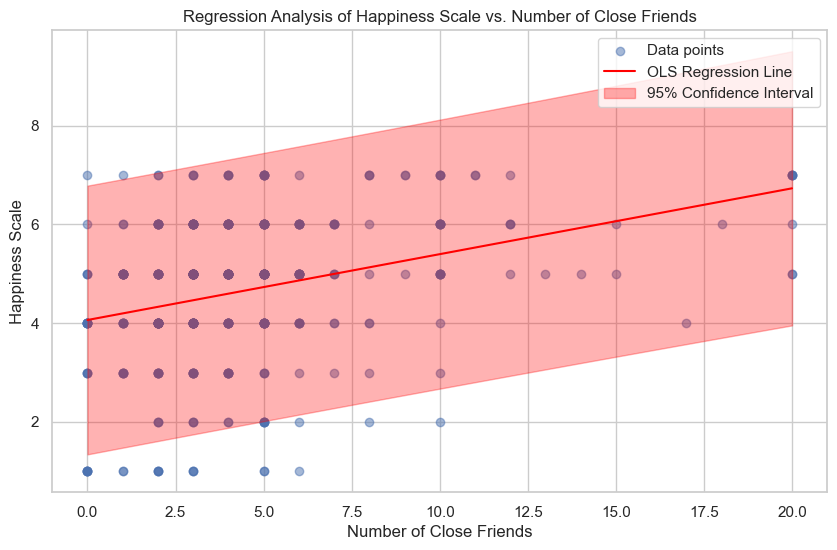

In [441]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Assuming df_happinessScale_numFriends is your DataFrame
# Preparing the data
X = df_happinessScale_numFriends['CONNECTION_social_num_close_friends']  # Predictor
y = df_happinessScale_numFriends['WELLNESS_subjective_happiness_scale_happy']  # Response

# Adding a constant to the predictor variable, necessary for statsmodels' OLS model
X = sm.add_constant(X)

# Fit an OLS model
model = sm.OLS(y, X).fit()

# Plotting the data points
plt.figure(figsize=(10, 6))
plt.scatter(X['CONNECTION_social_num_close_friends'], y, alpha=0.5, label='Data points')

# Generating values for the regression line
x_pred = np.linspace(X['CONNECTION_social_num_close_friends'].min(), X['CONNECTION_social_num_close_friends'].max(), 50)
x_pred2 = sm.add_constant(x_pred)  # Need to add a constant to these as well

# Predicting y values for our line and confidence intervals
predictions = model.get_prediction(x_pred2)
predictions_summary_frame = predictions.summary_frame()
y_pred = predictions_summary_frame['mean']
ci_lower = predictions_summary_frame['obs_ci_lower']
ci_upper = predictions_summary_frame['obs_ci_upper']

# Plotting the regression line
plt.plot(x_pred, y_pred, color='red', label='OLS Regression Line')

# Plotting the confidence interval
plt.fill_between(x_pred, ci_lower, ci_upper, color='red', alpha=0.3, label='95% Confidence Interval')

# Adding labels and title
plt.title('Regression Analysis of Happiness Scale vs. Number of Close Friends')
plt.xlabel('Number of Close Friends')
plt.ylabel('Happiness Scale')
plt.legend()

# print(model.summary())

# Show the plot
plt.show()


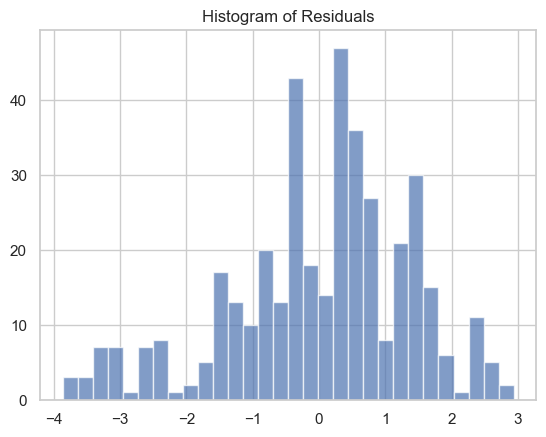

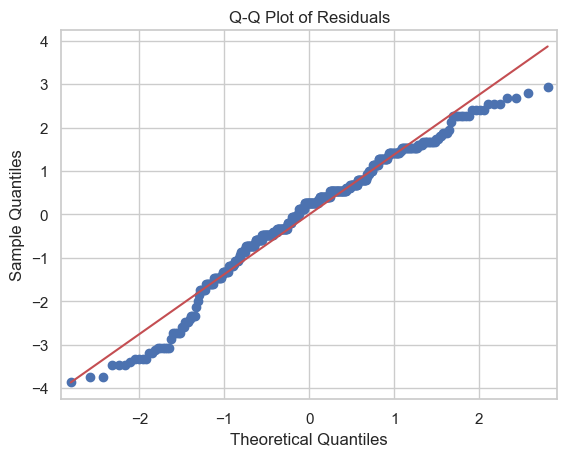

Shapiro-Wilk Test: ShapiroResult(statistic=0.9669695537826892, pvalue=7.256213097393527e-08)


In [442]:
import statsmodels.api as sm
import scipy.stats as stats
import matplotlib.pyplot as plt

# Fit the OLS model
model = sm.OLS(y, X).fit()
residuals = model.resid

# Histogram of residuals
plt.hist(residuals, bins=30, alpha=0.7, color='b')
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot
fig = sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Shapiro-Wilk test
shapiro_test = stats.shapiro(residuals)
print('Shapiro-Wilk Test:', shapiro_test)


The Q-Q Plot of residuals helps visualize how closely the model follows a normal distribution. Towards the ends and the beggining the points stear off the line which is a violation of the normal distribution. Therefore, the deviations in the tails suggest that while the bulk of your data may conform reasonably well to a normal distribution, the extreme values do not.

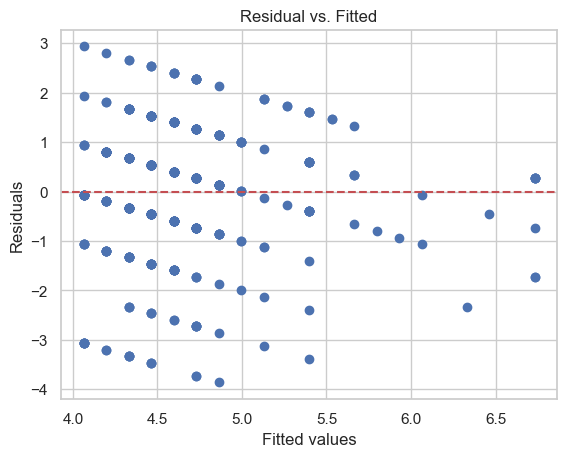

Breusch-Pagan test: (2.9460133174065692, 0.08608969003133642, 2.9530147994285088, 0.08649324463169308)


In [444]:
# Residual vs. Fitted Values Plot
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual vs. Fitted')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

# Breusch-Pagan test
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuals, model.model.exog)
print('Breusch-Pagan test:', bp_test)


Based on this plot, there does not seem to be a significant violation of the homoscedasticity assumption. The residuals are relatively evenly spread across different levels of fitted values, indicating that the variance of the errors is roughly constant. So, no clear heteroscedasticity: 

!! Justify limitation and explain why you're using it.

In [447]:
df_happinessScale_numFriends.CONNECTION_social_barriers_shy

21       Not Selected
71       Not Selected
77       Not Selected
113      Not Selected
186          I am shy
             ...     
11366    Not Selected
11373        I am shy
11380    Not Selected
11412    Not Selected
11428    Not Selected
Name: CONNECTION_social_barriers_shy, Length: 401, dtype: object

In [448]:
df_happinessScale_numFriends.columns

Index(['CONNECTION_social_barriers_shy',
       'WELLNESS_subjective_happiness_scale_happy',
       'CONNECTION_social_num_close_friends', 'DATASET',
       'WELLNESS_self_rated_mental_health',
       'WELLNESS_self_rated_physical_health',
       'CONNECTION_social_num_family_p7d', 'CONNECTION_social_time_family_p7d',
       'CONNECTION_social_time_friends_p7d',
       'CONNECTION_social_time_friends_p7d',
       'CONNECTION_activities_new_friend_p3m', 'CONNECTION_activities_hug_p3m',
       'CONNECTION_activities_church_p3m',
       'CONNECTION_activities_onlinegames_p3m',
       'CONNECTION_activities_computer_games_p3m',
       'CONNECTION_activities_coffee_p3m', 'CONNECTION_activities_walk_p3m'],
      dtype='object')

In [449]:
df_happinessScale_numFriends.shape

(401, 17)

In [450]:
import statsmodels.formula.api as smf

linear_model_specification = '''
Q('WELLNESS_subjective_happiness_scale_happy') ~ CONNECTION_social_num_close_friends
'''
m2324 = smf.ols(linear_model_specification, df_happinessScale_numFriends)
m2324.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                          
==========================================================================================================
Dep. Variable:     Q('WELLNESS_subjective_happiness_scale_happy')   R-squared:                       0.112
Model:                                                        OLS   Adj. R-squared:                  0.110
Method:                                             Least Squares   F-statistic:                     50.21
Date:                                            Sun, 24 Nov 2024   Prob (F-statistic):           6.31e-12
Time:                                                    10:57:26   Log-Likelihood:                -697.17
No. Observations:                                             401   AIC:                             1398.
Df Residuals:                                                 399   BIC:                             1406.
Df Model:                                                       1                                         
Covariance Type:                                        nonrobust                                         
=======================================================================================================
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
Intercept                               4.0637      0.109     37.234      0.000       3.849       4.278
CONNECTION_social_num_close_friends     0.1334      0.019      7.086      0.000       0.096       0.170
==============================================================================
Omnibus:                       21.959   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.197
Skew:                          -0.597   Prob(JB):                     5.57e-06
Kurtosis:                       3.153   Cond. No.                         9.35
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [451]:
linear_model_specification = '''
Q('WELLNESS_subjective_happiness_scale_happy') ~ 
    CONNECTION_social_num_close_friends + 
    CONNECTION_social_barriers_shy
'''
m2324 = smf.ols(linear_model_specification, df_happinessScale_numFriends)
m2324.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                          
==========================================================================================================
Dep. Variable:     Q('WELLNESS_subjective_happiness_scale_happy')   R-squared:                       0.146
Model:                                                        OLS   Adj. R-squared:                  0.142
Method:                                             Least Squares   F-statistic:                     34.13
Date:                                            Sun, 24 Nov 2024   Prob (F-statistic):           2.08e-14
Time:                                                    10:57:26   Log-Likelihood:                -689.19
No. Observations:                                             401   AIC:                             1384.
Df Residuals:                                                 398   BIC:                             1396.
Df Model:                                                       2                                         
Covariance Type:                                        nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                          3.6324      0.152     23.957      0.000       3.334       3.931
CONNECTION_social_barriers_shy[T.Not Selected]     0.6371      0.159      4.019      0.000       0.325       0.949
CONNECTION_social_num_close_friends                0.1226      0.019      6.565      0.000       0.086       0.159
==============================================================================
Omnibus:                       22.790   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.261
Skew:                          -0.610   Prob(JB):                     3.27e-06
Kurtosis:                       3.152   Cond. No.                         17.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [485]:
model = "+".join(df_happinessScale_numFriends.columns)
model

'CONNECTION_social_barriers_shy+WELLNESS_subjective_happiness_scale_happy+CONNECTION_social_num_close_friends+DATASET+WELLNESS_self_rated_mental_health+WELLNESS_self_rated_physical_health+CONNECTION_social_num_family_p7d+CONNECTION_social_time_family_p7d+CONNECTION_social_time_friends_p7d+CONNECTION_social_time_friends_p7d+CONNECTION_activities_new_friend_p3m+CONNECTION_activities_hug_p3m+CONNECTION_activities_church_p3m+CONNECTION_activities_onlinegames_p3m+CONNECTION_activities_computer_games_p3m+CONNECTION_activities_coffee_p3m+CONNECTION_activities_walk_p3m'

In [487]:
linear_model_specification = f'''
Q('WELLNESS_subjective_happiness_scale_happy') ~ {model}
'''
m2324 = smf.ols(linear_model_specification, df_happinessScale_numFriends)
m2324.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                          OLS Regression Results                                          
==========================================================================================================
Dep. Variable:     Q('WELLNESS_subjective_happiness_scale_happy')   R-squared:                       1.000
Model:                                                        OLS   Adj. R-squared:                  1.000
Method:                                             Least Squares   F-statistic:                 8.117e+29
Date:                                            Sun, 24 Nov 2024   Prob (F-statistic):               0.00
Time:                                                    10:58:45   Log-Likelihood:                 12723.
No. Observations:                                             401   AIC:                        -2.533e+04
Df Residuals:                                                 344   BIC:                        -2.510e+04
Df Model:                                                      56                                         
Covariance Type:                                        nonrobust                                         
============================================================================================================================================
                                                                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                 5.096e-15    2.7e-15      1.885      0.060   -2.22e-16    1.04e-14
CONNECTION_social_barriers_shy[T.Not Selected]                            -5.43e-16   5.52e-16     -0.984      0.326   -1.63e-15    5.42e-16
WELLNESS_self_rated_mental_health[T.Fair]                                 2.082e-16   1.06e-15      0.196      0.845   -1.88e-15     2.3e-15
WELLNESS_self_rated_mental_health[T.Good]                                 2.377e-15   1.05e-15      2.270      0.024    3.17e-16    4.44e-15
WELLNESS_self_rated_mental_health[T.Poor]                                 1.232e-15   1.27e-15      0.972      0.332   -1.26e-15    3.72e-15
WELLNESS_self_rated_mental_health[T.Very good]                            5.213e-16   1.03e-15      0.507      0.613    -1.5e-15    2.55e-15
WELLNESS_self_rated_physical_health[T.Fair]                               2.873e-15   1.28e-15      2.240      0.026    3.51e-16    5.39e-15
WELLNESS_self_rated_physical_health[T.Good]                              -7.073e-16   1.25e-15     -0.568      0.571   -3.16e-15    1.74e-15
WELLNESS_self_rated_physical_health[T.Poor]                               2.318e-16    1.5e-15      0.155      0.877   -2.72e-15    3.18e-15
WELLNESS_self_rated_physical_health[T.Very good]                         -3.903e-17   1.26e-15     -0.031      0.975   -2.53e-15    2.45e-15
CONNECTION_activities_new_friend_p3m[T.A few times a week]               -5.596e-15   2.49e-15     -2.246      0.025   -1.05e-14   -6.96e-16
CONNECTION_activities_new_friend_p3m[T.Daily or almost daily]             -3.06e-15   4.88e-15     -0.628      0.531   -1.27e-14    6.53e-15
CONNECTION_activities_new_friend_p3m[T.Less than monthly]                -1.381e-15   1.37e-15     -1.006      0.315   -4.08e-15    1.32e-15
CONNECTION_activities_new_friend_p3m[T.Monthly]                           -3.87e-15   1.52e-15     -2.548      0.011   -6.86e-15   -8.83e-16
CONNECTION_activities_new_friend_p3m[T.Not in the past three months]     -2.577e-15   1.33e-15     -1.937      0.054   -5.19e-15    3.96e-17
CONNECTION_activities_new_friend_p3m[T.Weekly]                            2.548e-15   1.94e-15      1.315      0.189   -1.26e-15    6.36e-15
CONNECTION_activities_hug_p3m[T.A few times a week]                       4.509e-15   8.79e-16  